In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_seq_items = 2000

# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from models import random_forest_model as model

# First Model Experiments

### Data Preparation

In [ ]:
journey_18 = pd.read_csv('../data/processed/journey_data_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/journey_data_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
journey_train_18 = journey_18.copy()
journey_test_19 = journey_19.copy()

In [ ]:
journey_train_18.head(2)

rental_id            end_date         end_station_name  \
0  72337672.0 2018-01-01 00:07:00  Millbank Tower, Pimlico   
1  72337673.0 2018-01-01 01:16:00    South Parade, Chelsea   

           start_date       start_station_name  day_of_week  hour  is_weekend  \
0 2018-01-01 00:00:00  Grosvenor Road, Pimlico            0     0         0.0   
1 2018-01-01 00:02:00    South Parade, Chelsea            0     0         0.0   

   part_of_day  month  ...  election_seats_percentage_lab  \
0            5    1.0  ...                           0.32   
1            5    1.0  ...                           0.26   

   election_seats_percentage_ld  election_seats_percentage_gre  \
0                          0.00                            0.0   
1                          0.02                            0.0   

   election_seats_percentage_ind  occupation_high_level_ratio_ratio  \
0                            0.0                           0.443089   
1                            0.0                           0.460353   

   occupation_small_intermediate_ratio_ratio  \
0                                   0.161098   
1                                   0.177567   

   occupation_lower_level_ratio_ratio  occupation_unemployed_ratio_ratio  \
0                            0.148262                           0.118178   
1                            0.144639                           0.104780   

   occupation_student_ratio_ratio  earnings_workplace  
0                        0.129374             60046.0  
1                        0.112661             41723.0  

[2 rows x 104 columns]

In [ ]:
x_train, y_train, all_train, x_test, y_test, all_test = model.aggregate_demand_hourly(journey_train_18, journey_test_19)

ValueError: cannot insert start_date_hour, already exists

In [ ]:
print("Shape x_train and y_train",  x_train.shape, y_train.shape)

Shape x_train and y_train (101744, 106) (101744,)


In [ ]:
x_train.head()

day_of_week  hour  is_weekend  part_of_day  month  season  bank_holiday  \
0            0     0         0.0            5    1.0       4           1.0   
1            0     0         0.0            5    1.0       4           1.0   
2            0     0         0.0            5    1.0       4           1.0   
3            0     0         0.0            5    1.0       4           1.0   
4            0     0         0.0            5    1.0       4           1.0   

   tempmax  tempmin  temp  ...  start_borough_Hackney  \
0      8.1      6.1   7.1  ...                      0   
1      8.1      6.1   7.1  ...                      0   
2      8.1      6.1   7.1  ...                      1   
3      8.1      6.1   7.1  ...                      0   
4      8.1      6.1   7.1  ...                      0   

   start_borough_Hammersmith and Fulham  start_borough_Islington  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     1                        0   
4                                     0                        1   

   start_borough_Kensington and Chelsea  start_borough_Lambeth  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   start_borough_Newham  start_borough_Southwark  start_borough_Tower Hamlets  \
0                     0                        0                            0   
1                     0                        0                            0   
2                     0                        0                            0   
3                     0                        0                            0   
4                     0                        0                            0   

   start_borough_Wandsworth  start_borough_Westminster  
0                         0                          0  
1                         0                          0  
2                         0                          0  
3                         0                          0  
4                         0                          0  

[5 rows x 106 columns]

In [ ]:
y_train.head()

0    90
1    72
2     7
3     9
4     6
Name: demand, dtype: int64

### Model: Random Forest, Basic

In [ ]:
# fit and predict
rf, y_pred = model.random_forest_fit_pred(x_train, y_train, x_test)

In [ ]:
# feature importance
print(model.get_feature_importance(rf, x_train))

                                       Feature  Importance
1                                         hour    0.411692
19                                day_of_month    0.070477
7                                      tempmax    0.048354
22                           bike_docks_counts    0.044179
21                         bike_station_counts    0.041058
0                                  day_of_week    0.028759
3                                  part_of_day    0.026028
76               residence_lengh_uk_born_ratio    0.024285
50                              health_1_ratio    0.023357
58                         crime_offences_rate    0.021764
2                                   is_weekend    0.021640
39                     religion_buddhist_ratio    0.021162
36                     ethnic_arab_other_ratio    0.018899
105                  start_borough_Westminster    0.018678
11                                    humidity    0.014238
15                                  cloudcover    0.0136

In [ ]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 52.955354185793986
MAE: 26.135791759498268
R2 Score: 0.8543282832839151


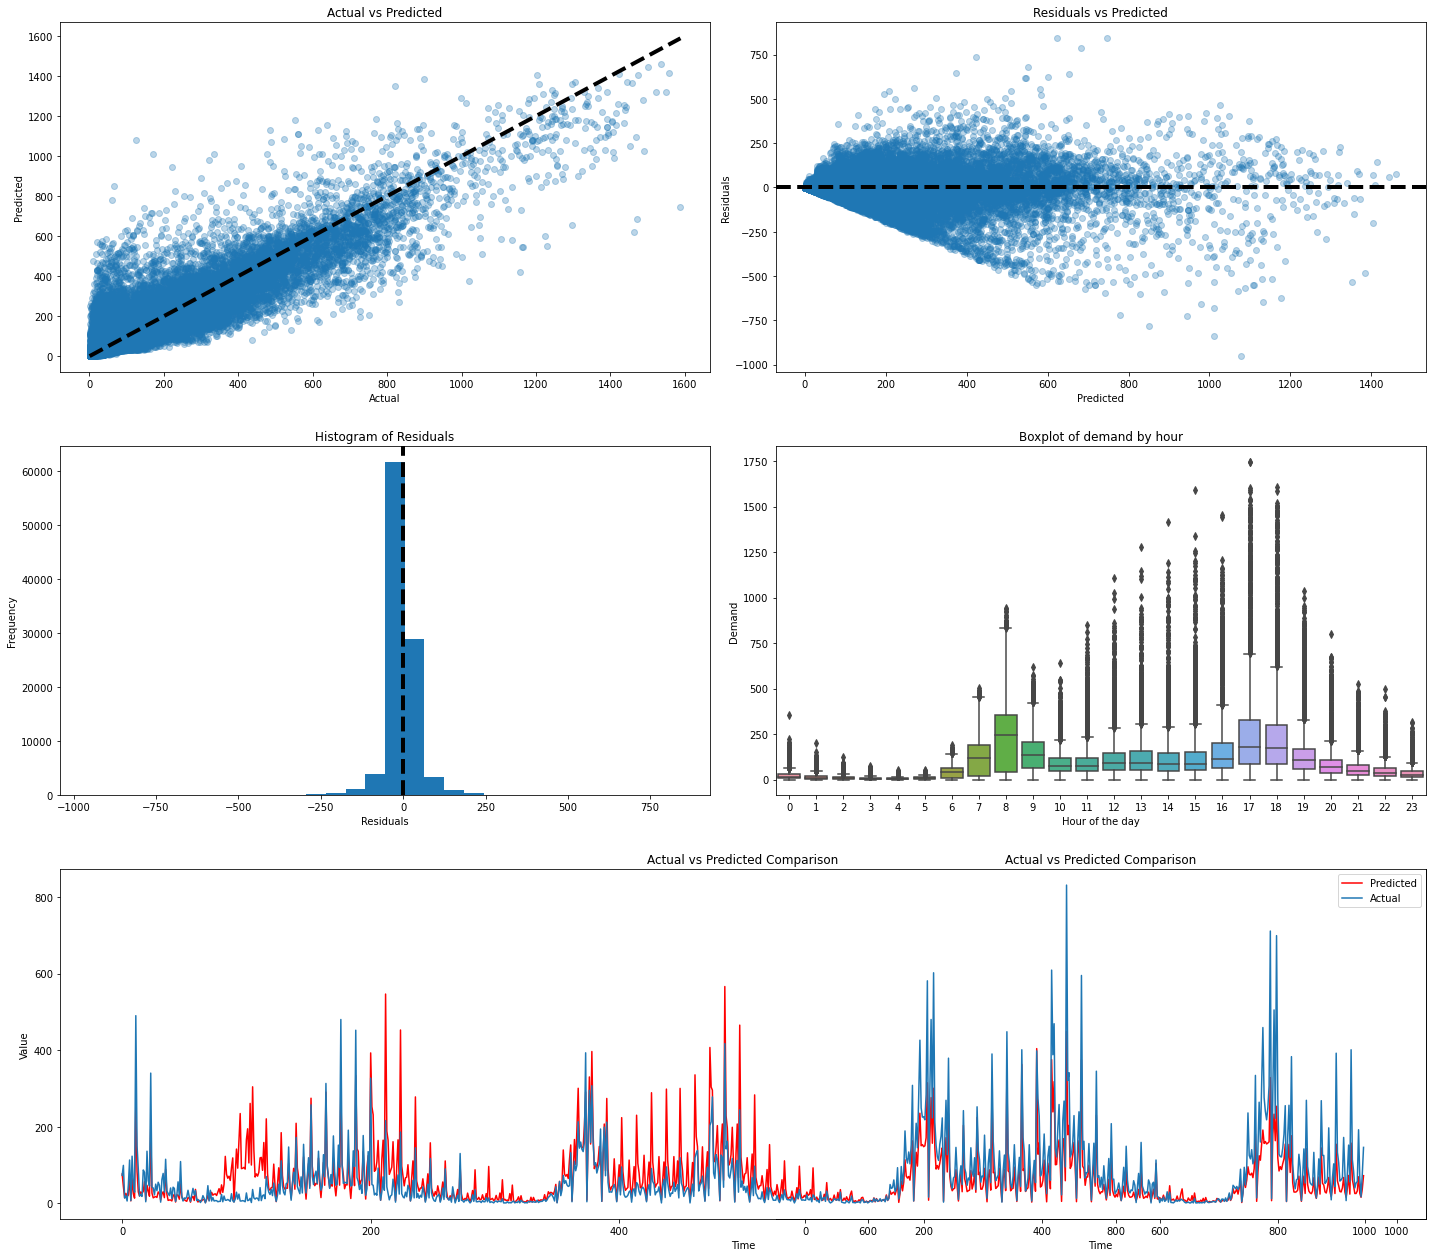

In [ ]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred, train_all)

Heteroscedasticity: the variance of the residuals increases as the predicted values increase, 90 quantil -> streuung an gewissen tagen

In [ ]:
df_errors, df_errors_entries = model.get_enornous_entrie(y_test, y_pred, x_test)
df_errors.head()

Actual  Predicted     Error
96237      126  1077.9375  951.9375
100411    1464   622.2600  841.7400
100399    1588   747.3750  840.6250
96249      172  1010.7400  838.7400
100387    1470   683.3900  786.6100

In [ ]:
df_errors_entries.head()

day_of_week  hour  is_weekend  part_of_day  month  season  \
96237             1    17         0.0            4   12.0       4   
100411            2    16         0.0            3   12.0       4   
100399            2    15         0.0            3   12.0       4   
96249             1    18         0.0            4   12.0       4   
100387            2    14         0.0            3   12.0       4   

        bank_holiday  tempmax  tempmin  temp  ...  start_borough_Hackney  \
96237            0.0     11.6      1.6   7.4  ...                      0   
100411           1.0      9.1      2.5   5.7  ...                      0   
100399           1.0      9.1      2.5   5.7  ...                      0   
96249            0.0     11.6      1.6   7.4  ...                      0   
100387           1.0      9.1      2.5   5.7  ...                      0   

        start_borough_Hammersmith and Fulham  start_borough_Islington  \
96237                                      0                        0   
100411                                     0                        0   
100399                                     0                        0   
96249                                      0                        0   
100387                                     0                        0   

        start_borough_Kensington and Chelsea  start_borough_Lambeth  \
96237                                      0                      0   
100411                                     0                      0   
100399                                     0                      0   
96249                                      0                      0   
100387                                     0                      0   

        start_borough_Newham  start_borough_Southwark  \
96237                      0                        0   
100411                     0                        0   
100399                     0                        0   
96249                      0                        0   
100387                     0                        0   

        start_borough_Tower Hamlets  start_borough_Wandsworth  \
96237                             0                         0   
100411                            0                         0   
100399                            0                         0   
96249                             0                         0   
100387                            0                         0   

        start_borough_Westminster  
96237                           1  
100411                          1  
100399                          1  
96249                           1  
100387                          1  

[5 rows x 106 columns]

TODO: aggregatione ueber zeit plotten, mittelwert und stnd. abweichung zeichnen

/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_62604/3281433436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackney_data['date'] = hackney_data['start_date_hour'].dt.date
/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_62604/3281433436.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackney_data['hour_of_day'] = hackney_data['start_date_hour'].dt.hour
/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_62604/3281433436.py:11: SettingWithCopyWarning: 
A value is try

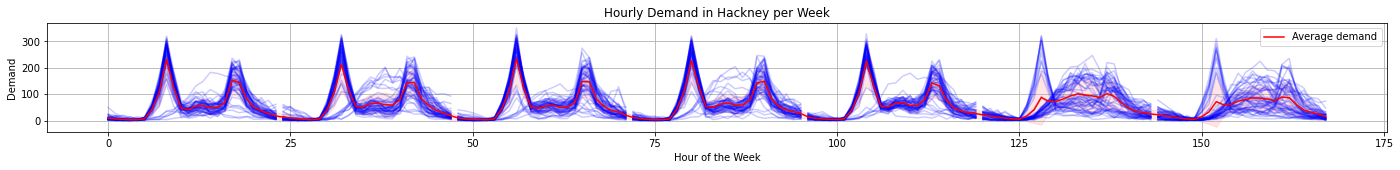

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_demand_by_week_borough(train_data, test_data, borough):
    # Filter out the training data for the specified borough
    train_borough_data = train_data[train_data[f'start_borough_{borough}'] == 1]

    # Filter out the test data for the specified borough
    test_borough_data = test_data[test_data[f'start_borough_{borough}'] == 1]

    # Add columns for the date, hour, and week for training data
    train_borough_data['date'] = train_borough_data['start_date_hour'].dt.date
    train_borough_data['hour_of_day'] = train_borough_data['start_date_hour'].dt.hour
    train_borough_data['day_of_week'] = train_borough_data['start_date_hour'].dt.dayofweek
    train_borough_data['week_of_year'] = train_borough_data['start_date_hour'].dt.isocalendar().week

    # Convert hours into continuous hours for a week (0-167) for training data
    train_borough_data['hour_of_week'] = train_borough_data['day_of_week'] * 24 + train_borough_data['hour_of_day']

    # Aggregate by week and hour of the week for training data
    train_borough_weekly_hourly = train_borough_data.groupby(['week_of_year', 'hour_of_week']).agg({'demand': 'sum'}).reset_index()

    # Calculate the average and standard deviation over all weeks for training data
    train_average_demand_all = train_borough_weekly_hourly.groupby('hour_of_week')['demand'].mean()
    train_std_demand_all = train_borough_weekly_hourly.groupby('hour_of_week')['demand'].std()

    # Add columns for the date, hour, and week for test data
    test_borough_data['date'] = test_borough_data['start_date_hour'].dt.date
    test_borough_data['hour_of_day'] = test_borough_data['start_date_hour'].dt.hour
    test_borough_data['day_of_week'] = test_borough_data['start_date_hour'].dt.dayofweek
    test_borough_data['week_of_year'] = test_borough_data['start_date_hour'].dt.isocalendar().week

    # Convert hours into continuous hours for a week (0-167) for test data
    test_borough_data['hour_of_week'] = test_borough_data['day_of_week'] * 24 + test_borough_data['hour_of_day']

    # Aggregate by week and hour of the week for test data
    test_borough_weekly_hourly = test_borough_data.groupby(['week_of_year', 'hour_of_week']).agg({'demand': 'sum'}).reset_index()

    # Create subplots for each week
    fig, axs = plt.subplots(nrows=52, ncols=2, figsize=(24, 100), constrained_layout=True)

    # Plot each week's data for training and test data
    for idx, week in enumerate(train_borough_weekly_hourly['week_of_year'].unique()):
        # Plot the average and standard deviation from all weeks for training data
        axs[idx, 0].plot(train_average_demand_all.index, train_average_demand_all, color='orange', label='Average demand with std. dev.')
        axs[idx, 0].fill_between(train_std_demand_all.index, (train_average_demand_all - train_std_demand_all), (train_average_demand_all + train_std_demand_all),
                               color='orange', alpha=.2)
        
        train_week_data = train_borough_weekly_hourly[train_borough_weekly_hourly['week_of_year'] == week]
        axs[idx, 0].plot(train_week_data['hour_of_week'], train_week_data['demand'], color='blue', label='Actual demand (Train)')

        axs[idx, 0].set_title(f'Week {week} - {borough} (Train)')
        axs[idx, 0].set_xlabel('Hour of the Week')
        axs[idx, 0].set_ylabel('Demand')
        axs[idx, 0].set_xticks(np.arange(0, 168, 24))  # Set x-axis ticks every 24 hours
        axs[idx, 0].legend(loc="upper right")
        axs[idx, 0].grid(True)

        # Plot test data for the corresponding week
        test_week_data = test_borough_weekly_hourly[test_borough_weekly_hourly['week_of_year'] == week]
        axs[idx, 1].plot(test_week_data['hour_of_week'], test_week_data['demand'], color='green', label='Actual demand (Test)')

        axs[idx, 1].set_title(f'Week {week} - {borough} (Test)')
        axs[idx, 1].set_xlabel('Hour of the Week')
        axs[idx, 1].set_ylabel('Demand')
        axs[idx, 1].set_xticks(np.arange(0, 168, 24))  # Set x-axis ticks every 24 hours
        axs[idx, 1].legend(loc="upper right")
        axs[idx, 1].grid(True)

    plt.show()

# Call the function for each borough
boroughs = ['Hackney', 'Westminster', 'Camden']  # Add more boroughs as needed
for borough in boroughs:
    plot_demand_by_week_borough(train_all, test_all, borough)


/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_62604/3857289565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackney_data['date'] = hackney_data['start_date_hour'].dt.date
/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_62604/3857289565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackney_data['hour_of_day'] = hackney_data['start_date_hour'].dt.hour
/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_62604/3857289565.py:10: SettingWithCopyWarning: 
A value is tryi

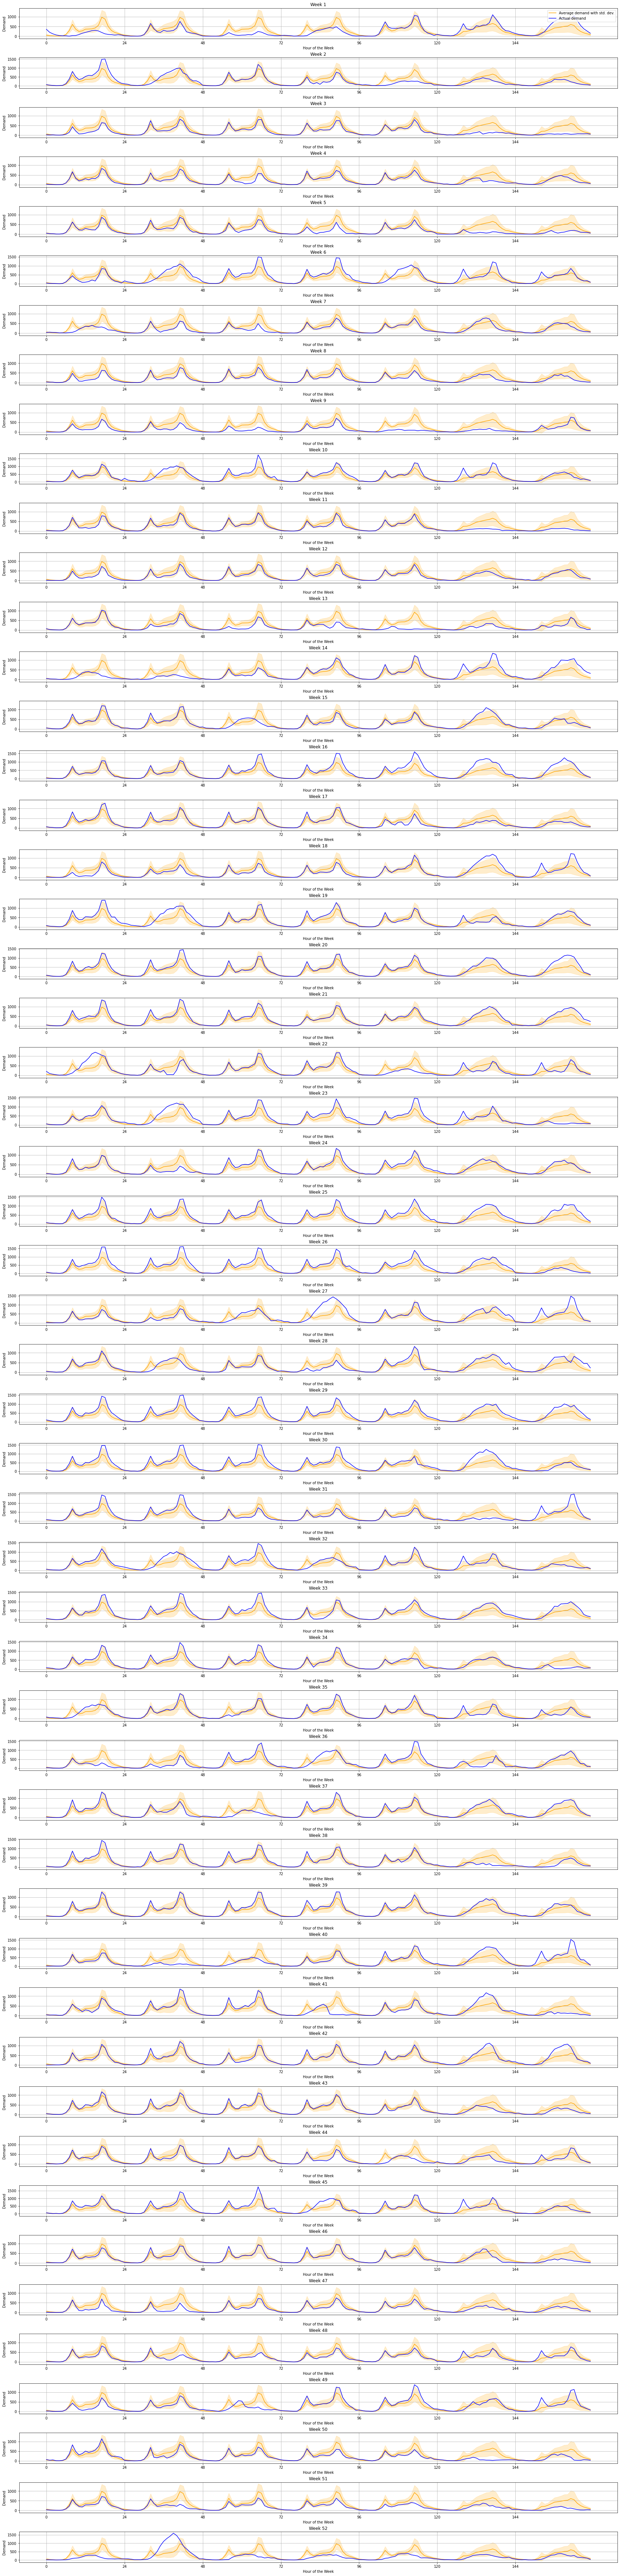

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the data for Hackney
hackney_data = train_all[train_all['start_borough_Westminster'] == 1]

# Add columns for the date, hour, and week
hackney_data['date'] = hackney_data['start_date_hour'].dt.date
hackney_data['hour_of_day'] = hackney_data['start_date_hour'].dt.hour
hackney_data['day_of_week'] = hackney_data['start_date_hour'].dt.dayofweek
hackney_data['week_of_year'] = hackney_data['start_date_hour'].dt.isocalendar().week

# Convert hours into continuous hours for a week (0-167)
hackney_data['hour_of_week'] = hackney_data['day_of_week'] * 24 + hackney_data['hour_of_day']

# Aggregate by week and hour of the week
hackney_weekly_hourly = hackney_data.groupby(['week_of_year', 'hour_of_week']).agg({'demand': 'sum'}).reset_index()

# Calculate the average and standard deviation over all weeks
average_demand_all = hackney_weekly_hourly.groupby('hour_of_week')['demand'].mean()
std_demand_all = hackney_weekly_hourly.groupby('hour_of_week')['demand'].std()

# Create subplots for each week
fig, axs = plt.subplots(nrows=52, ncols=1, figsize=(24, 100), constrained_layout=True)

# Plot each week's data
for idx, week in enumerate(hackney_weekly_hourly['week_of_year'].unique()):
    # Plot the average and standard deviation from all weeks
    axs[idx].plot(average_demand_all.index, average_demand_all, color='orange', label='Average demand with std. dev.')
    axs[idx].fill_between(std_demand_all.index, (average_demand_all - std_demand_all), (average_demand_all + std_demand_all),
                           color='orange', alpha=.2)
    
    week_data = hackney_weekly_hourly[hackney_weekly_hourly['week_of_year'] == week]
    axs[idx].plot(week_data['hour_of_week'], week_data['demand'], color='blue', label='Actual demand')


    axs[idx].set_title(f'Week {week}')
    axs[idx].set_xlabel('Hour of the Week')
    axs[idx].set_ylabel('Demand')
    axs[idx].set_xticks(np.arange(0, 168, 24))  # Set x-axis ticks every 24 hours
    if idx == 0:
        axs[idx].legend(loc="upper right")
    axs[idx].grid(True)

plt.show()


In [ ]:
 # Hyperparam tuning


### Model: Random Forest, Log-Transformed

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Apply a log transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the model on the transformed target
rf.fit(x_train, y_train_log)

# Predict on the test set
y_pred_log = rf.predict(x_test)

# Since we transformed the target using log1p (log(1 + x)), we need to transform the predictions back to the original scale using expm1 (exp(x) - 1)
y_pred = np.expm1(y_pred_log)

# Calculate updated evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('Tuned RMSE:', rmse)
print('Tuned MAE:', mae)
print('Tuned R2 Score:', r2)
print('Tuned Explained Variance Score:', evs)


Tuned RMSE: 99.16506108576655
Tuned MAE: 47.1072112205503
Tuned R2 Score: 0.3430311206231823
Tuned Explained Variance Score: 0.4445946429705847


### Model: Gradient Boosting

In [ ]:
gb, y_pred_gb = model.gradient_boosting_fit_pred(x_train, y_train, x_test)

In [ ]:
rmse, mae, r2 = model.evaluation_metric(y_test, y_pred_gb)


RMSE: 65.10478974748199
MAE: 36.787428593647725
R2 Score: 0.7798182264900467
Explained Variance Score: 0.7799647453245836


### Model: Random Forest, Stand. Demand

Modeling different borough-level effects:
- Interaction terms between boroughs and other important features
- Hierarchical or mixed-effects models: useful when there are multiple levels of grouping in the data -> these models allow for the estimation of borough-level effects that are partially pooled, meaning they learn from the overall trends in the data but also allow for borough-specific deviations
- Standardization 

In [ ]:
x_train_stand, y_train_stand, x_test_stand, y_test_stand, test_all = model.aggregate_demand_hourly(journey_train_18, journey_test_19, standardise=True)

In [ ]:
# fit and predict
rf_stand, y_pred_stand = model.random_forest_fit_pred(x_train_stand, y_train_stand, x_test_stand)

In [ ]:
# feature importance
print(model.get_feature_importance(rf_stand, x_train_stand))

                                       Feature  Importance
1                                         hour    0.440604
19                                day_of_month    0.080782
7                                      tempmax    0.046634
0                                  day_of_week    0.038324
3                                  part_of_day    0.035379
2                                   is_weekend    0.034302
15                                  cloudcover    0.019292
14                                   windspeed    0.017915
11                                    humidity    0.016351
20                                 day_of_year    0.016086
62                distance_work_5km_10km_ratio    0.014947
18                              daylight_hours    0.014217
8                                      tempmin    0.013503
12                                      precip    0.013420
16                                  visibility    0.012950
59                            business_density    0.0123

In [ ]:
# evaluation metrics
rmse_stand, mae_stand, r2_stand = model.evaluation_metrics(y_test_stand, y_pred_stand)

print('RMSE:', rmse_stand)
print('MAE:', mae_stand)
print('R2 Score:', r2_stand)

RMSE: 0.032780155972454324
MAE: 0.01654479913444593
R2 Score: 0.7817375741474


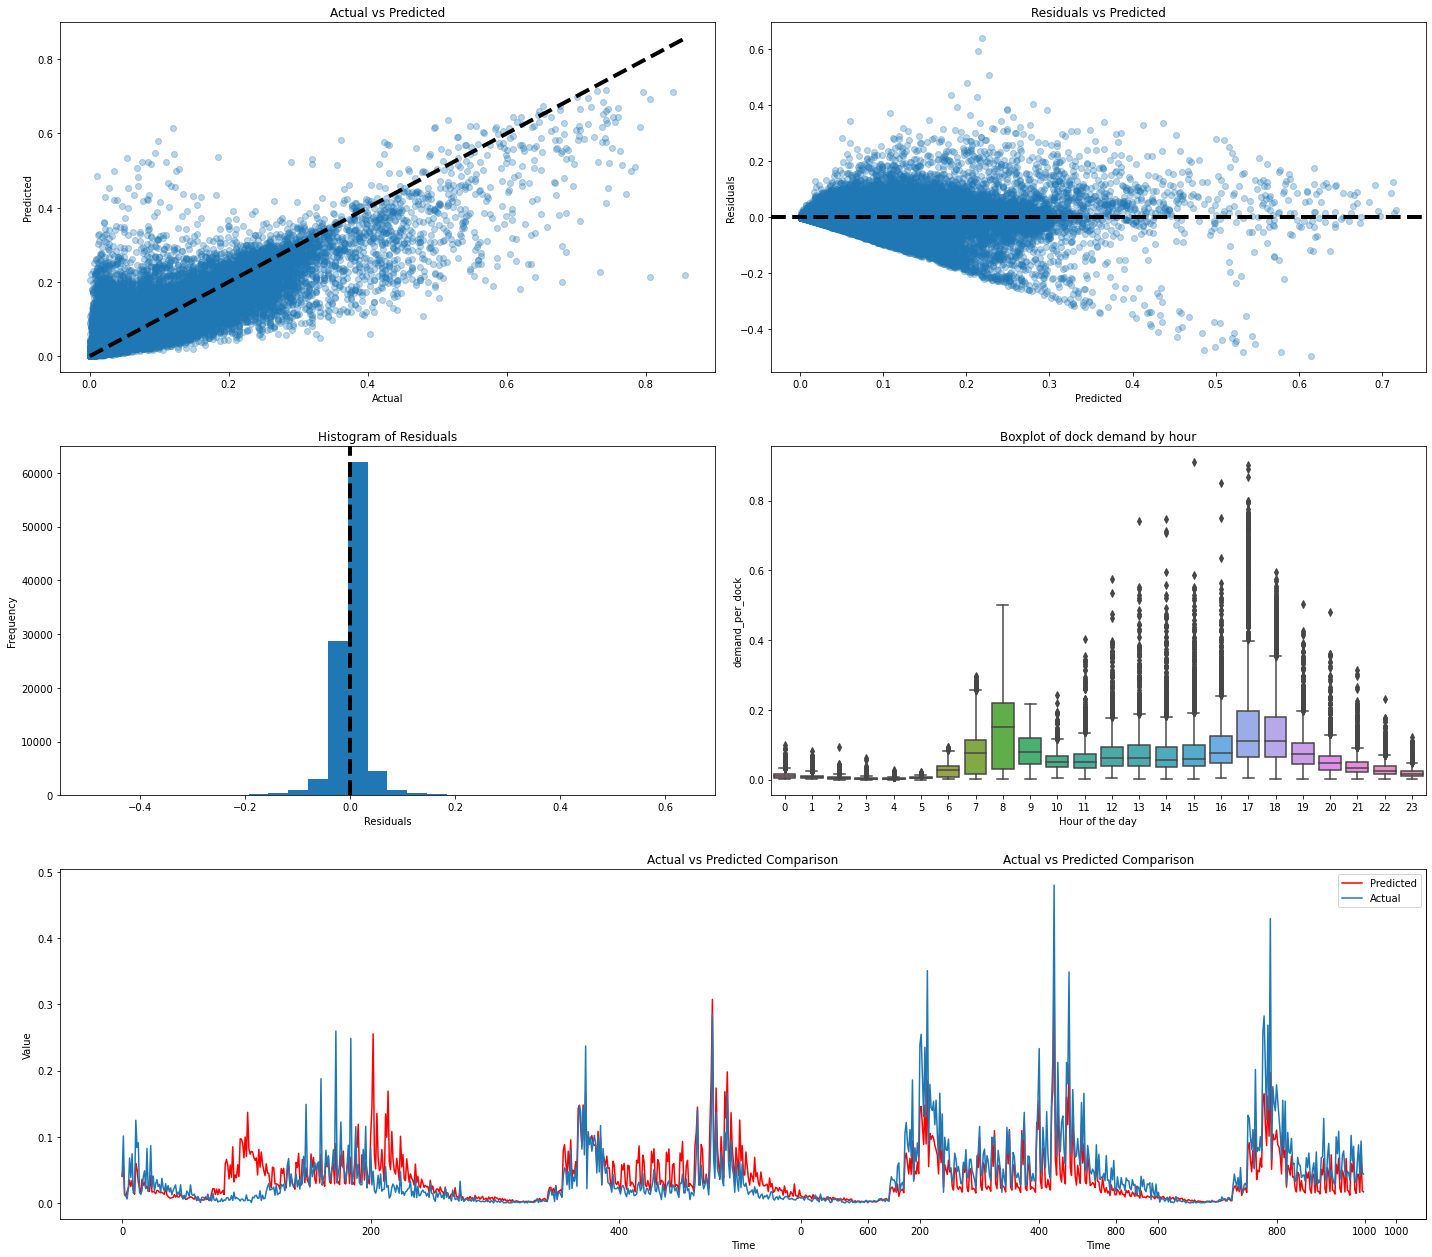

In [ ]:
# evaluation visualisation
model.evaluation_vis(y_test_stand, y_pred_stand, test_all)

In [ ]:
df_errors_stand, df_errors_entries_stand = model.get_enornous_entrie(y_test_stand, y_pred_stand, test_all)
df_errors_stand.head()

Actual  Predicted     Error
31199  0.856354   0.218854  0.637500
31187  0.806630   0.214240  0.592390
31211  0.734807   0.227436  0.507371
78632  0.119754   0.614713  0.494959
36245  0.098260   0.578654  0.480394

In [ ]:
df_errors_entries_stand.head()

start_date_hour           start_borough   rental_id  \
31199 2018-04-23 09:00:00  Kensington and Chelsea  74882399.0   
31187 2018-04-23 08:00:00  Kensington and Chelsea  74877403.0   
31211 2018-04-23 10:00:00  Kensington and Chelsea  74884935.0   
78632 2018-10-09 03:00:00           Tower Hamlets  80152389.0   
36245 2018-05-11 11:00:00                 Lambeth  82004141.0   

                 end_date                      end_station_name  \
31199 2018-04-23 09:23:00                Chadwell Street, Angel   
31187 2018-04-23 08:44:00  Christopher Street, Liverpool Street   
31211 2018-04-23 10:02:00        Sumner Place, South Kensington   
78632 2018-10-09 03:11:00            Shadwell Station, Shadwell   
36245 2018-05-11 11:18:00         Sedding Street, Sloane Square   

               start_date                          start_station_name  \
31199 2018-04-23 09:00:00                Denyer Street, Knightsbridge   
31187 2018-04-23 08:00:00             Harcourt Terrace, West Brompton   
31211 2018-04-23 10:00:00  South Kensington Station, South Kensington   
78632 2018-10-09 03:04:00         Bethnal Green Garden, Bethnal Green   
36245 2018-05-11 11:02:00                Kennington Cross, Kennington   

       day_of_week  hour  is_weekend  ...  \
31199            0     9         0.0  ...   
31187            0     8         0.0  ...   
31211            0    10         0.0  ...   
78632            1     3         0.0  ...   
36245            4    11         0.0  ...   

       start_borough_Hammersmith and Fulham  start_borough_Islington  \
31199                                     0                        0   
31187                                     0                        0   
31211                                     0                        0   
78632                                     0                        0   
36245                                     0                        0   

       start_borough_Kensington and Chelsea  start_borough_Lambeth  \
31199                                     1                      0   
31187                                     1                      0   
31211                                     1                      0   
78632                                     0                      0   
36245                                     0                      1   

       start_borough_Newham  start_borough_Southwark  \
31199                     0                        0   
31187                     0                        0   
31211                     0                        0   
78632                     0                        0   
36245                     0                        0   

       start_borough_Tower Hamlets  start_borough_Wandsworth  \
31199                            0                         0   
31187                            0                         0   
31211                            0                         0   
78632                            1                         0   
36245                            0                         0   

       start_borough_Westminster  demand_per_dock  
31199                          0         0.104539  
31187                          0         0.203118  
31211                          0         0.075653  
78632                          0         0.002701  
36245                          0         0.042874  

[5 rows x 119 columns]